In [93]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [94]:
# Load Iris dataset
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Perform basic data exploration
print(df.head())  # print first 5 rows
print(df.describe())  # provide statistical summary of the dataset
print(df.info())  # provide concise summary of the DataFrame
df.isnull().sum()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

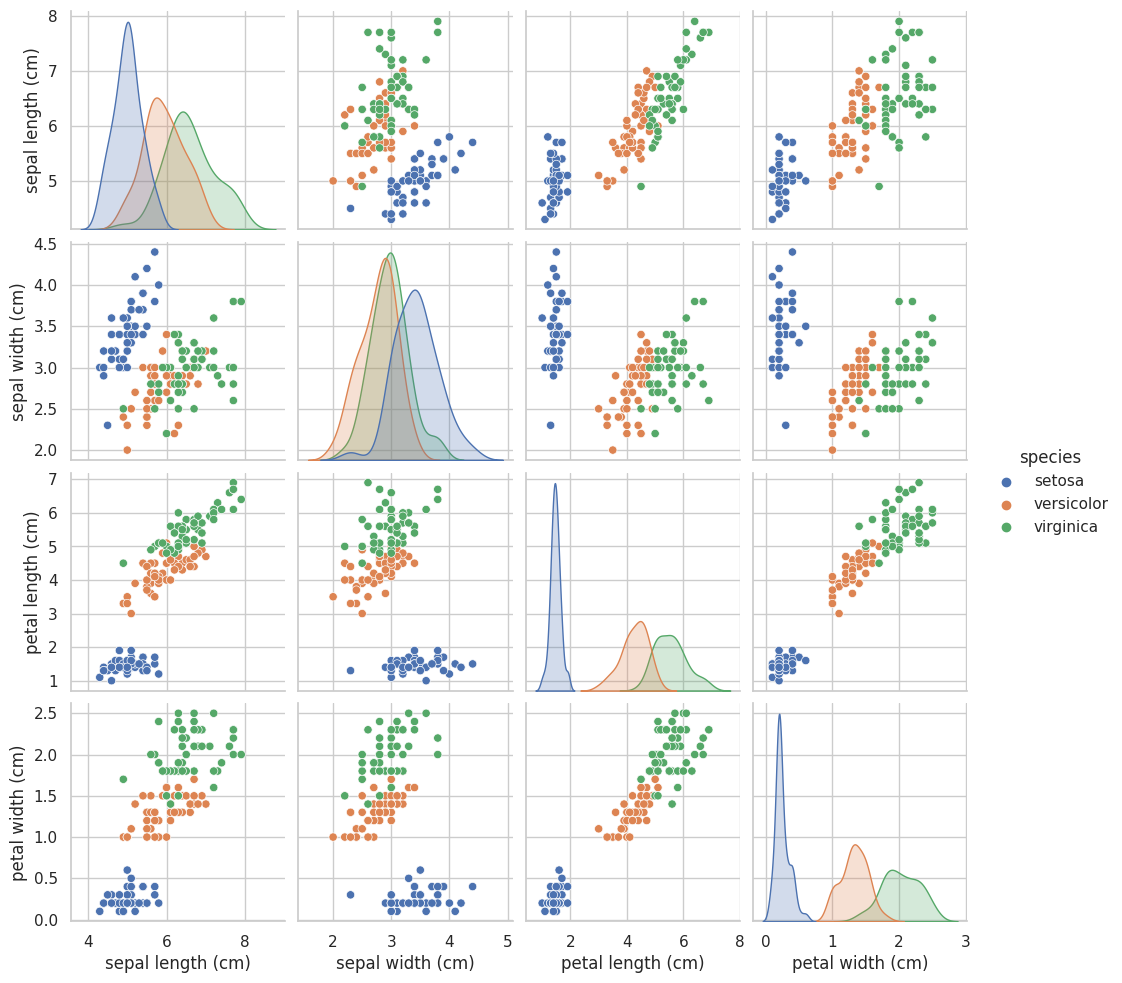

In [95]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map the target values to the species names
df['species'] = df['species'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

# Visualize the distribution of the three classes across the different features
sns.pairplot(df, hue='species')

# Show the plot
plt.show()


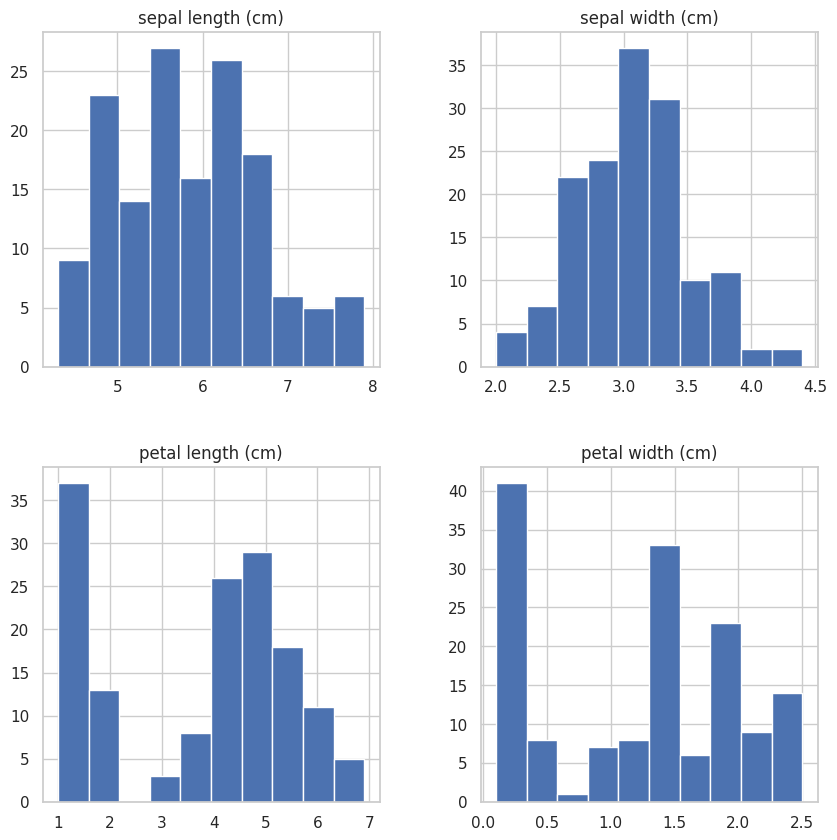

<ipython-input-96-15d8607196af>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


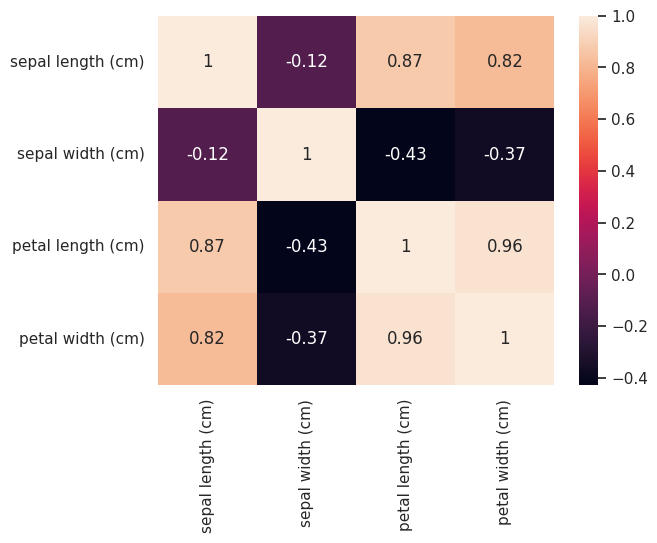

In [96]:
# Display histograms for each feature
df.hist(figsize=(10, 10))
plt.show()

# Correlation matrix
corr_matrix = df.corr()

# Display heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

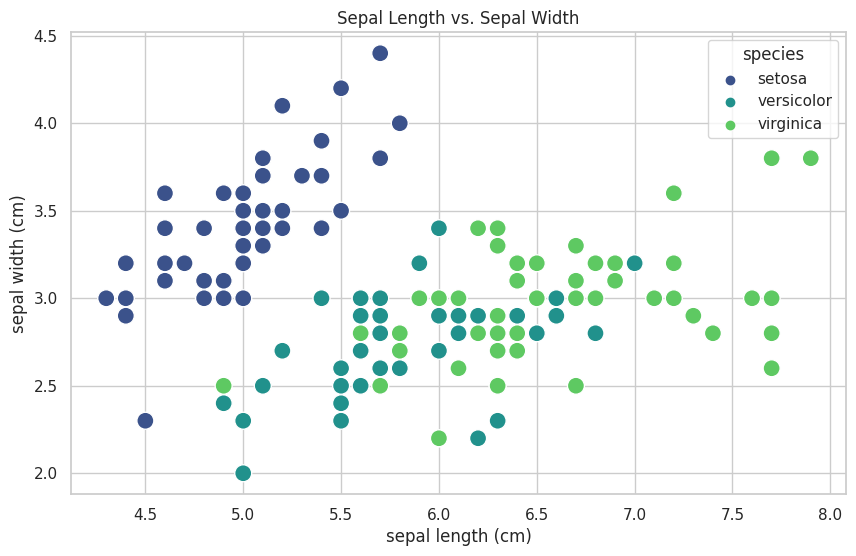

In [97]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Draw a scatter plot while assigning color to each class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis', data=df, s=150)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

Accuracy on test set: 0.3


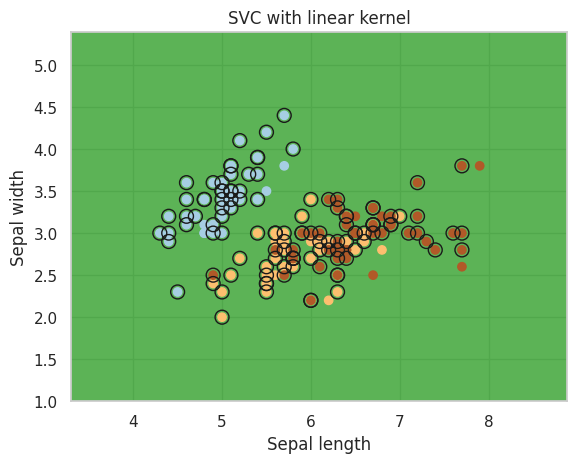

Accuracy on test set: 0.9


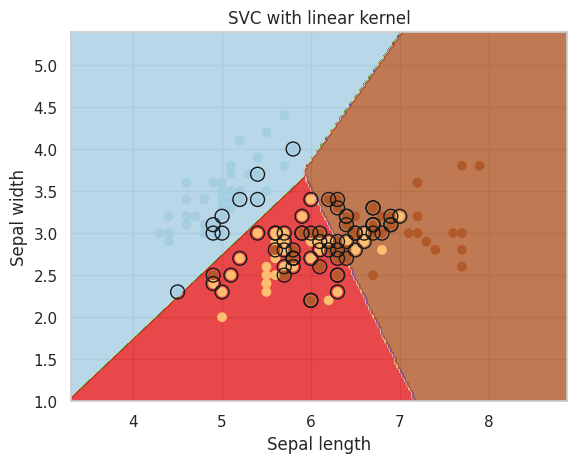

Accuracy on test set: 0.9


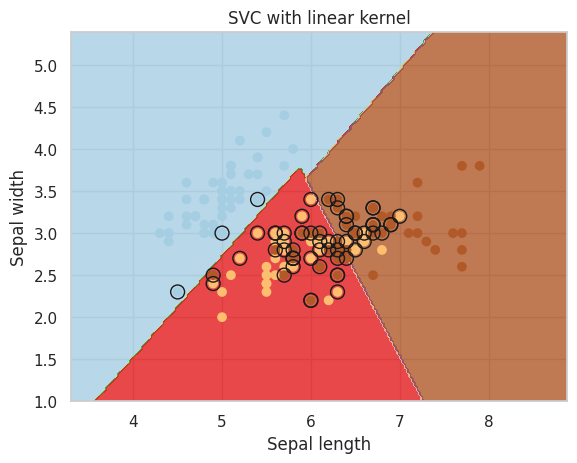

Accuracy on test set: 0.9


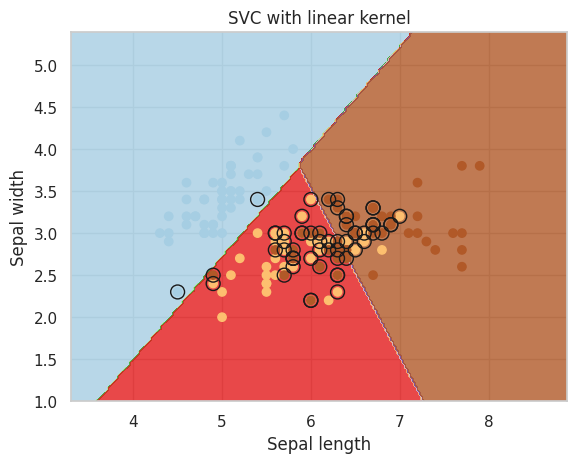

Accuracy on test set: 0.9


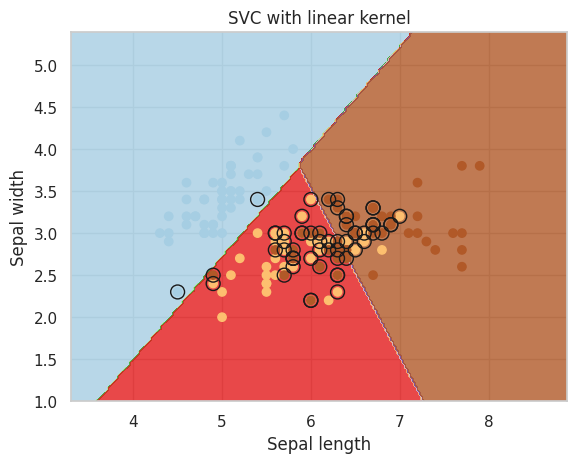

In [98]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# Select only two features for simplicity
X = iris.data[:, :2]
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C_values = [0.001, 1, 10, 100, 1000]
for C in C_values:
      # Train the model
      clf = svm.SVC(kernel='linear', C=C)
      clf.fit(X_train, y_train)
      print("Accuracy on test set:", clf.score(X_test, y_test))
      # Create a mesh to plot in
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      h = (x_max / x_min)/100
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

      # Plot the decision boundary
      plt.subplot(1, 1, 1)
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

      # Plot also the training points
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
      plt.xlabel('Sepal length')
      plt.ylabel('Sepal width')
      plt.xlim(xx.min(), xx.max())
      plt.title('SVC with linear kernel')
      # Plot the support vectors
      plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                  facecolors='none', zorder=10, edgecolors='k')

      plt.show()


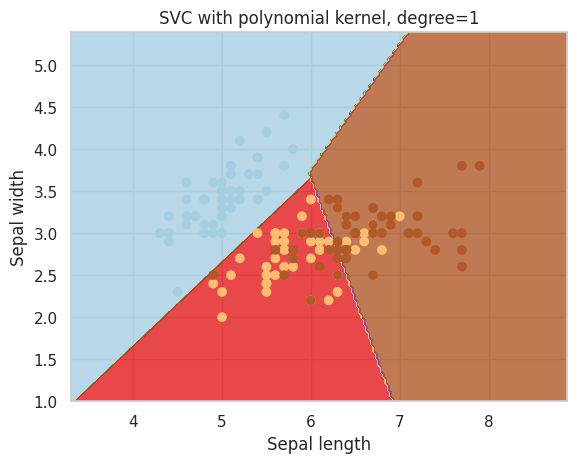

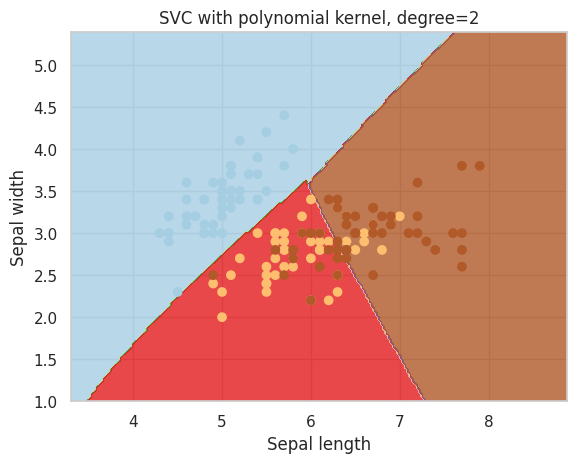

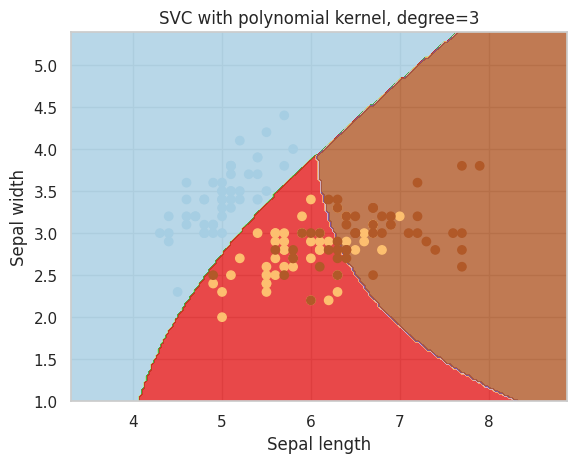

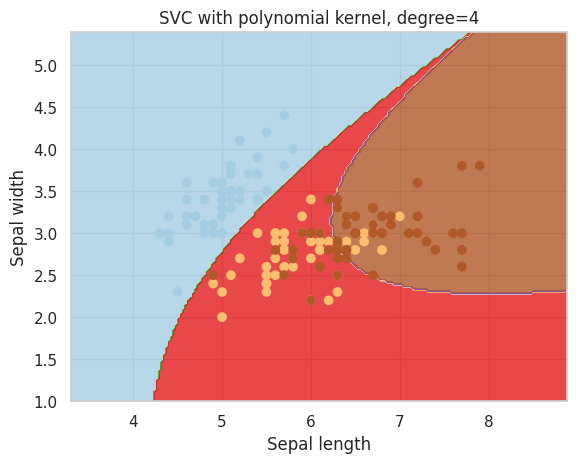

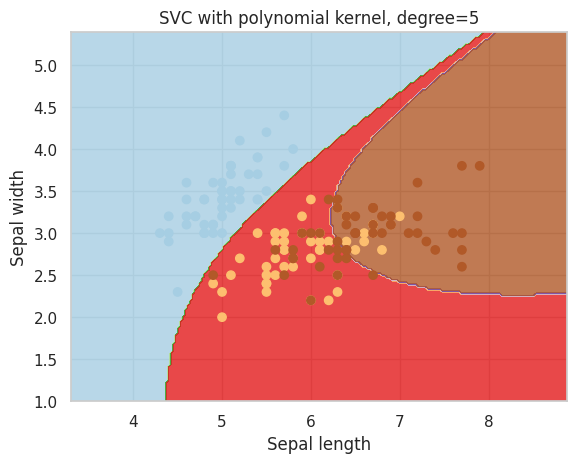

In [99]:
# SVM classifier with a polynomial kernel with different degrees

degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create a SVM classifier with a polynomial kernel
    poly_svm = svm.SVC(kernel='poly', degree=degree, C=1.0)
    poly_svm.fit(X, y)

    # Plot the decision boundary for polynomial kernel
    plt.subplot(1, 1, 1)
    Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with polynomial kernel, degree={}'.format(degree))

    # Plot the support vectors

    plt.show()


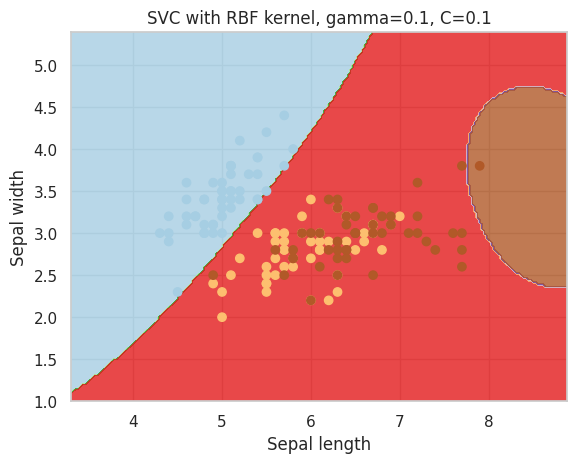

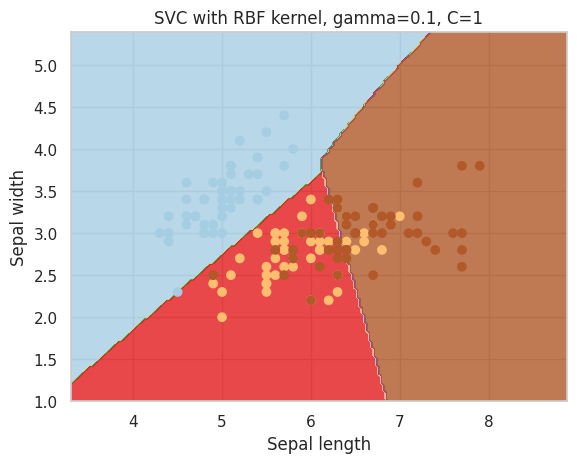

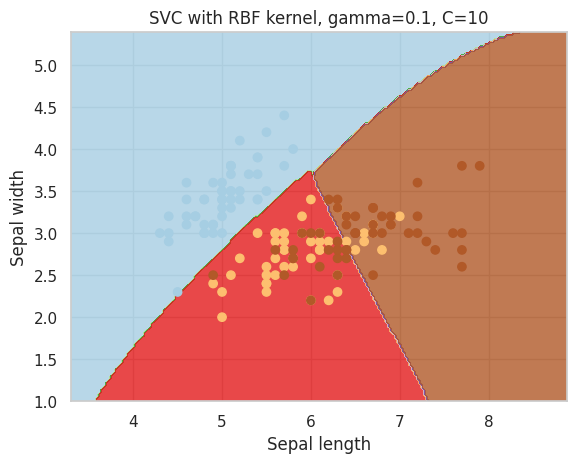

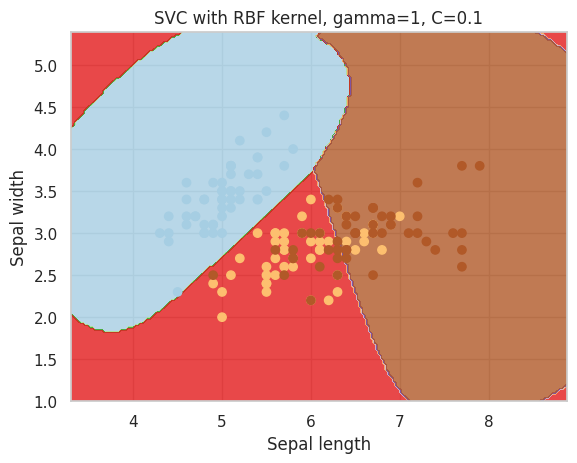

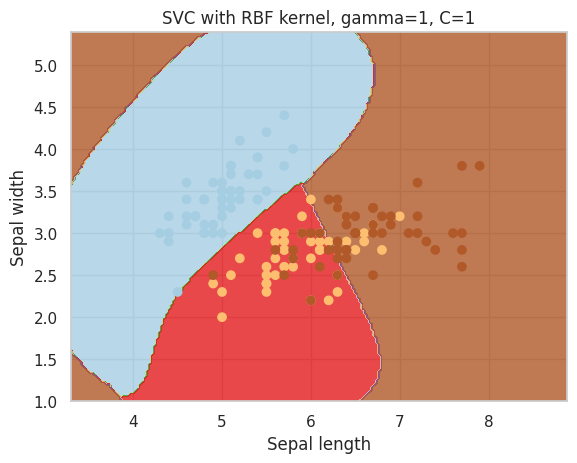

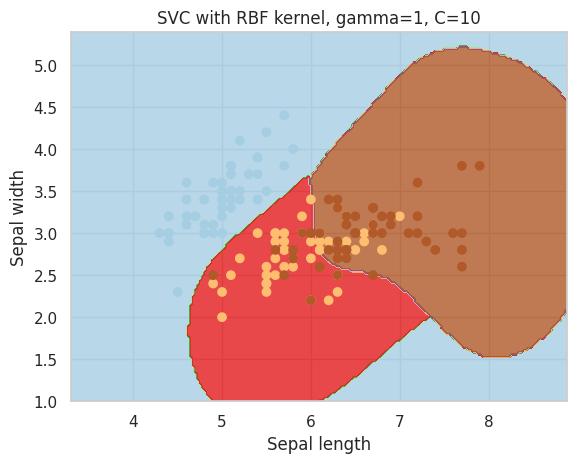

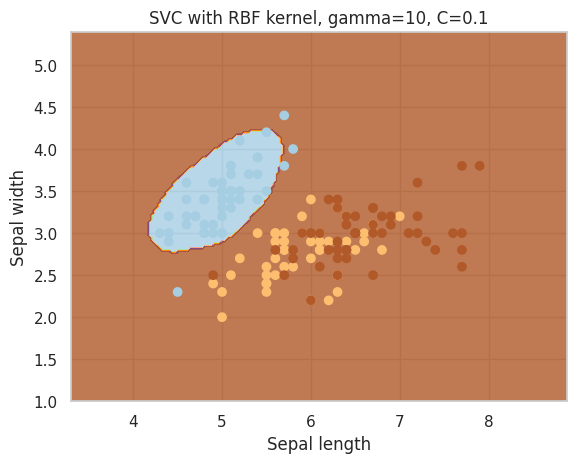

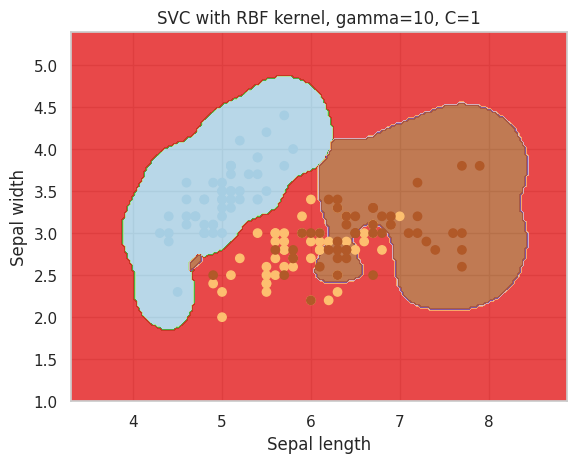

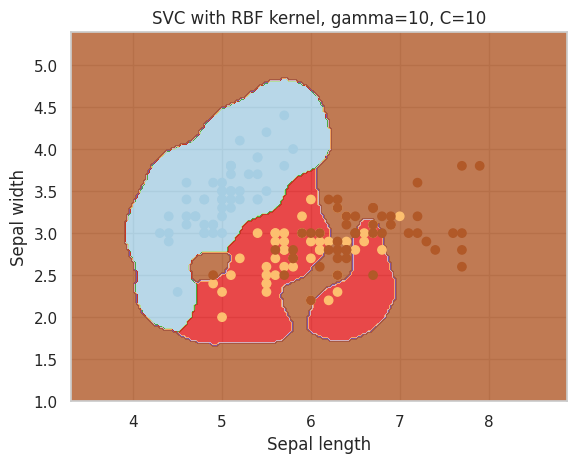

In [100]:
#SVM with Radial Basis Function (RBF) Kernel with multiple gammas and C's
gammas = [0.1, 1, 10]
Cs = [0.1, 1, 10]
# Train the model
for gamma in gammas:
    for C in Cs:
        # Create an SVM classifier with a RBF kernel
        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C)
        rbf_svc.fit(X_train, y_train)
        # Create a mesh to plot in
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        h = (x_max / x_min)/100
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Plot the decision boundary for RBF kernel
        plt.subplot(1, 1, 1)
        Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.title(f'SVC with RBF kernel, gamma={gamma}, C={C}')
        plt.show()







In [101]:
# Create a SVM classifier with a RBF kernel
rbf_svm = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
rbf_svm.fit(X_train, y_train)

# Make predictions
y_pred = rbf_svm.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9


In [102]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM with RBF kernel on the scaled data
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train_scaled, y_train)

# Evaluate the model
score_with_scaling = clf.score(X_test_scaled, y_test)
print("Accuracy with feature scaling: ", score_with_scaling)


Accuracy with feature scaling:  0.9


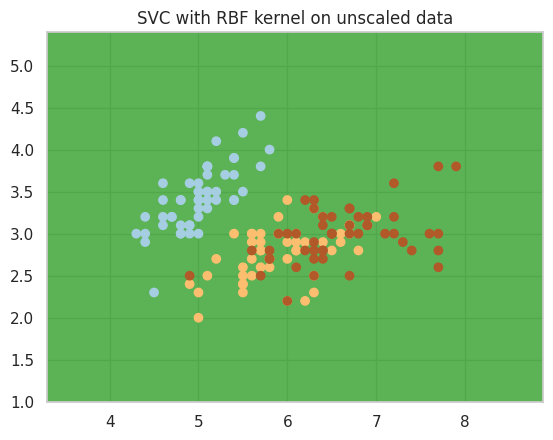

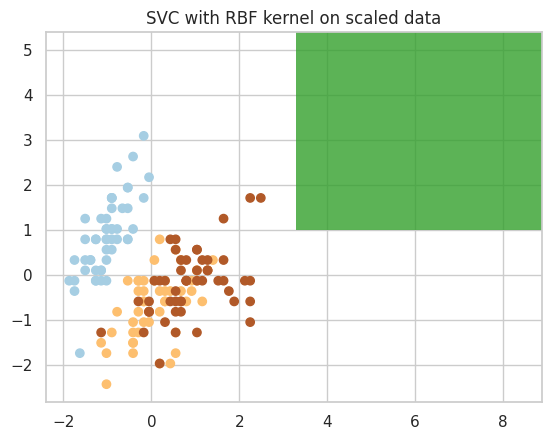

In [103]:
# Create an SVM classifier and fit with scaled data
rbf_svm_scaled = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
rbf_svm_scaled.fit(X_train_scaled, y_train)  # use the same y_train

# Create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary for unscaled data
Z = rbf_svm_unscaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVC with RBF kernel on unscaled data')
plt.show()

# Plot the decision boundary for scaled data
Z = rbf_svm_scaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVC with RBF kernel on scaled data')
plt.show()

In [104]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with linear kernel
clf_linear = svm.SVC(kernel='linear', C=1.0)
clf_linear.fit(X_train_scaled, y_train)

# Train SVM with polynomial kernel
clf_poly = svm.SVC(kernel='poly', degree=3, C=1.0)
clf_poly.fit(X_train_scaled, y_train)

# Train SVM with RBF kernel
clf_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf_rbf.fit(X_train_scaled, y_train)

# Evaluate the models
score_linear = clf_linear.score(X_test_scaled, y_test)
score_poly = clf_poly.score(X_test_scaled, y_test)
score_rbf = clf_rbf.score(X_test_scaled, y_test)

print("Accuracy with linear kernel: ", score_linear)
print("Accuracy with polynomial kernel: ", score_poly)
print("Accuracy with RBF kernel: ", score_rbf)


Accuracy with linear kernel:  0.9666666666666667
Accuracy with polynomial kernel:  0.9666666666666667
Accuracy with RBF kernel:  1.0


In [105]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different kernels
kernels = ['linear', 'poly', 'rbf']

# Train SVMs with different kernels
for kernel in kernels:
    if kernel == 'poly':
        for degree in [2, 3, 4]:
            # Train model
            clf = svm.SVC(kernel=kernel, degree=degree)
            clf.fit(X_train, y_train)
            # Make predictions
            y_pred = clf.predict(X_test)
            # Print accuracy
            print(f'Accuracy with {kernel} kernel of degree {degree}:', metrics.accuracy_score(y_test, y_pred))
    else:
        # Train model
        clf = svm.SVC(kernel=kernel)
        clf.fit(X_train, y_train)
        # Make predictions
        y_pred = clf.predict(X_test)
        # Print accuracy
        print(f'Accuracy with {kernel} kernel:', metrics.accuracy_score(y_test, y_pred))


Accuracy with linear kernel: 0.9666666666666667
Accuracy with poly kernel of degree 2: 0.8333333333333334
Accuracy with poly kernel of degree 3: 0.9666666666666667
Accuracy with poly kernel of degree 4: 0.7666666666666667
Accuracy with rbf kernel: 1.0


In [106]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np
# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# make it a binary classification problem
X = X[y != 0]
y = y[y != 0]
y[y==2] = -1

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a custom SVM Classifier
clf_custom = LinearSVM()
clf_custom.fit(X_train, y_train)
y_pred_custom = clf_custom.predict(X_test)

# Create a SVM Classifier from sklearn
clf_sklearn = SVC(kernel='linear')
clf_sklearn.fit(X_train, y_train)
y_pred_sklearn = clf_sklearn.predict(X_test)

# Model Accuracy
print("Accuracy of custom SVM:",metrics.accuracy_score(y_test, y_pred_custom))
print("Accuracy of sklearn SVM:",metrics.accuracy_score(y_test, y_pred_sklearn))


Accuracy of custom SVM: 0.5666666666666667
Accuracy of sklearn SVM: 0.6


In [108]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Convert to binary classification problem: Setosa vs. (Versicolour & Virginica)
y = np.where(y == 0, -1, 1)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train custom SVM
svm_custom = LinearSVM()
svm_custom.fit(X_train_std, y_train)
y_pred_custom = svm_custom.predict(X_test_std)

# Train scikit-learn SVM
svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train_std, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test_std)

# Compare accuracies
accuracy_custom = accuracy_score(y_test, y_pred_custom)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Custom SVM Accuracy: {accuracy_custom:.2f}")
print(f"Scikit-learn SVM Accuracy: {accuracy_sklearn:.2f}")


Custom SVM Accuracy: 1.00
Scikit-learn SVM Accuracy: 1.00
